In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# se guarda el dataset
df_crops = pd.read_csv('files/datasets/output/a01_dataset_ge_crops_cleaned.csv')


In [17]:
# se imprimen las primeras 5 filas del DataFrame
df_crops.head()

,variety,state,year,pct_(%),crop
0,Insect-resistant (Bt),Illinois,2000-01-01,13.0,corn
1,Insect-resistant (Bt),Illinois,2001-01-01,12.0,corn
2,Insect-resistant (Bt),Illinois,2002-01-01,18.0,corn
3,Insect-resistant (Bt),Illinois,2003-01-01,23.0,corn
4,Insect-resistant (Bt),Illinois,2004-01-01,26.0,corn


In [4]:
# se imprimen la información del DataFrame
df_crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   variety  3360 non-null   object 
 1   state    3360 non-null   object 
 2   year     3360 non-null   int64  
 3   pct_(%)  3260 non-null   float64
 4   crop     3360 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 131.4+ KB


In [8]:
# convertir 'year' a tipo fecha
df_crops['year'] = pd.to_datetime(df_crops['year'], format='%Y')

In [10]:
# Estadísticas descriptivas de del porcentaje sembrado del total del maíz
print("Estadísticas descriptivas del cultivo total sembrado de maíz:")
df_crops[df_crops['crop'] == 'corn']['pct_(%)'].describe()

Estadísticas descriptivas del cultivo total sembrado de maíz:


count    1400.000000
mean       37.898571
std        33.481344
min         0.000000
25%         9.000000
50%        23.000000
75%        76.000000
max        98.000000
Name: pct_(%), dtype: float64

In [11]:
print("Estadísticas descriptivas del cultivo total sembrado de algodón:")
df_crops[df_crops['crop'] == 'cotton']['pct_(%)'].describe()

Estadísticas descriptivas del cultivo total sembrado de algodón:


count    1092.000000
mean       45.540293
std        37.144418
min         0.000000
25%        10.000000
50%        32.000000
75%        88.000000
max       100.000000
Name: pct_(%), dtype: float64

In [13]:
print("Estadísticas descriptivas del cultivo total sembrado de soya:")
df_crops[df_crops['crop'] == 'soybean']['pct_(%)'].describe()

Estadísticas descriptivas del cultivo total sembrado de soya:


count    768.000000
mean      88.768229
std       11.034895
min       22.000000
25%       87.000000
50%       93.000000
75%       95.000000
max       99.000000
Name: pct_(%), dtype: float64

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
**Observaciones:**  
De acuerdo a los estadísticos descriptivos, se observa que menos del 50 % del total de los cultivos sembrados para maíz y algodón son genéticamente modificados, con un 37.9 % y  45.5 %, respectivamente. Mientras que para la soya el 88.8 % es genéticamente modificado.
    
</span>
    
</div>

In [44]:
# se filtra el DataFrame por el tipo de modificación genética, en donde se incluyan sólo los tipos
df_all_ge = df_crops[~(df_crops['variety'] == 'All GE varieties')]
df_all_ge.head()

,variety,state,year,pct_(%),crop
0,Insect-resistant (Bt),Illinois,2000-01-01,13.0,corn
1,Insect-resistant (Bt),Illinois,2001-01-01,12.0,corn
2,Insect-resistant (Bt),Illinois,2002-01-01,18.0,corn
3,Insect-resistant (Bt),Illinois,2003-01-01,23.0,corn
4,Insect-resistant (Bt),Illinois,2004-01-01,26.0,corn


In [45]:
print("Estadísticas descriptivas de del porcentaje de los cultivo transgénicos sembrados:")
df_all_ge['pct_(%)'].describe()

Estadísticas descriptivas de del porcentaje de los cultivo transgénicos sembrados:


count    2253.000000
mean       37.941855
std        34.307779
min         0.000000
25%         8.000000
50%        22.000000
75%        76.000000
max        99.000000
Name: pct_(%), dtype: float64

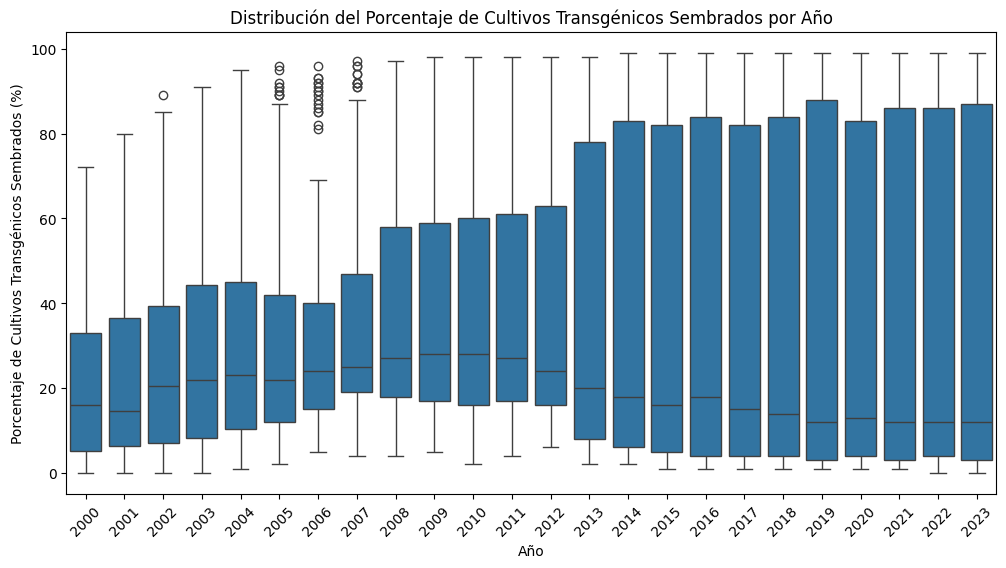

In [51]:
# Visualización de la distribución de del porcentaje de los cultivos gené ticamente modifcados ('pct_(%)') a lo largo de los años
plt.figure(figsize=(12, 6))

fig1 = sns.boxplot(data= df_all_ge,
                   x= df_crops['year'].dt.year,
                   y= 'pct_(%)'
                   )

fig1.set_title('Distribución del Porcentaje de Cultivos Transgénicos Sembrados por Año')
fig1.set_xlabel('Año')
fig1.set_ylabel('Porcentaje de Cultivos Transgénicos Sembrados (%)')
plt.xticks(rotation= 45)
plt.show()

In [98]:
# se grafica un histograma para la distribución del porcentaje de cultivos
fig2 =  px.histogram(df_all_ge,
                     x= 'pct_(%)',
                     title= 'Distribución del porcentaje de cultivos trasngénicos',
                     nbins= 100
                     )
fig2.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
**Observaciones:**  
Con base a los estadísticos descriptivos en promedio el 38 % de los cultivos sembrados son transgénicos, además en el gráfico de las distribución por año se aprecia un sesgo hacia la derecha, lo que significa que hay datos extremos mayores a la mediana (22) que hacen que la distribución no sea normal. Lo anterior se corrobora con el histograma de distribución del porcentaje de cultivos trangénicos sembrados.
    
</span>
    
</div>

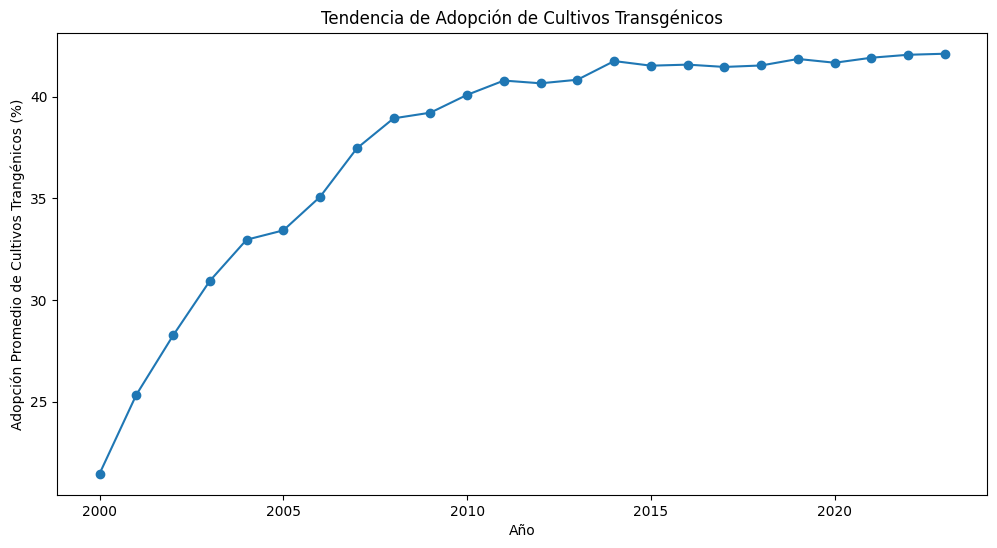

In [53]:
# Visualización de la tendencia temporal de adopción promedio por año
plt.figure(figsize=(12, 6))

fig3 = df_all_ge.groupby(df_crops['year'].dt.year)['pct_(%)'].mean().plot(marker='o')
fig3.set_title('Tendencia de Adopción de Cultivos Transgénicos')
fig3.set_xlabel('Año')
fig3.set_ylabel('Adopción Promedio de Cultivos Trangénicos (%)')
plt.grid(False)
plt.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
**Observaciones:**  
Desde el año 2000 hasta el 2023 se observa un considerable incremento en el uso de cultivos transgénicos. En el 2000 se empleaban menos del 15 % y en 2023 se usaron más del 40 %, un aumento por encima del 20 %. Lo anterior evidencia que el uso de cultivos trangénicos es cada vez mayor.
    
</span>
    
</div>

In [65]:
# Gráfico de barras de los estados con mayor adopción promedio

# se agrupan los 10 estados con mayor porcentaje de cultivos trangénicos
top_states = df_all_ge.groupby('state')['pct_(%)'].mean().nlargest(10).reset_index()


fig4 = px.bar(top_states, x='state', y='pct_(%)', 
             title='Top 10 Estados con Mayor Adopción de Cultivos Transgénicos', 
             labels={'state': 'Estado', 'pct_(%)': 'Adopción Promedio (%)'},
             color_discrete_sequence=['darkcyan'])

fig4.update_layout(xaxis_title='Estado', yaxis_title='Adopción Promedio (%)')

fig4.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
**Observaciones:**  
North Dakota es el estado con más cultivos de maíz, algodón y soya transgénicos sembrados con un 86.3 %, seguido de Mississippi, Arkansas, South Dakota, Nebraska, Kansas, Iowa, Minnesota, Missouri e Illinois; alrededor del 40 % fueron trangénicos.
    
</span>
    
</div>

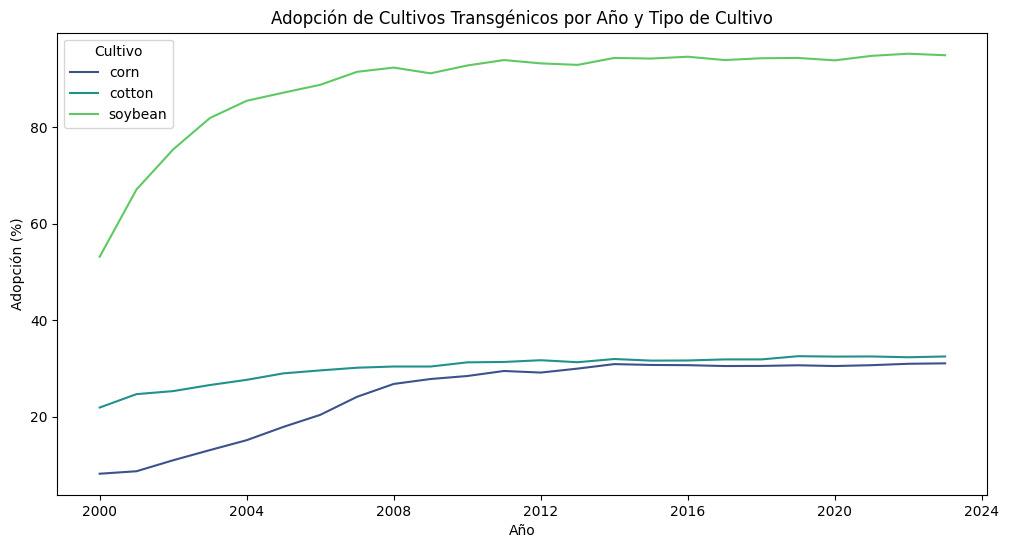

In [74]:
# Gráfico de líneas para mostrar adopción por cultivo a lo largo de los años
plt.figure(figsize=(12, 6))

fig5 = sns.lineplot(data= df_all_ge,
                    x='year', 
                    y='pct_(%)', 
                    hue= 'crop',  
                    palette='viridis', 
                    errorbar= None
                    )
fig5.set_title('Adopción de Cultivos Transgénicos por Año y Tipo de Cultivo')
fig5.set_xlabel('Año')
fig5.set_ylabel('Adopción (%)')

plt.legend(title='Cultivo')
plt.grid(False)
plt.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
**Observaciones:**  
Se observa en el gráfico que el cultivo trangénico que más se emplea es la soya, desde que se inicia con el registro de estos cultivos en el 2000 el porcentaje de la soya transgénica empleada es mucho mayor que el porcentaje del maíz y el algodón. Aproximadamente el 60 % de la soya en el 2000 fue trangénica y para el 2023 aumentó alrdedor al 90 %.

Ahora se analiza el tipo de modificación genética empleda para cada cultivo.
    
</span>
    
</div>

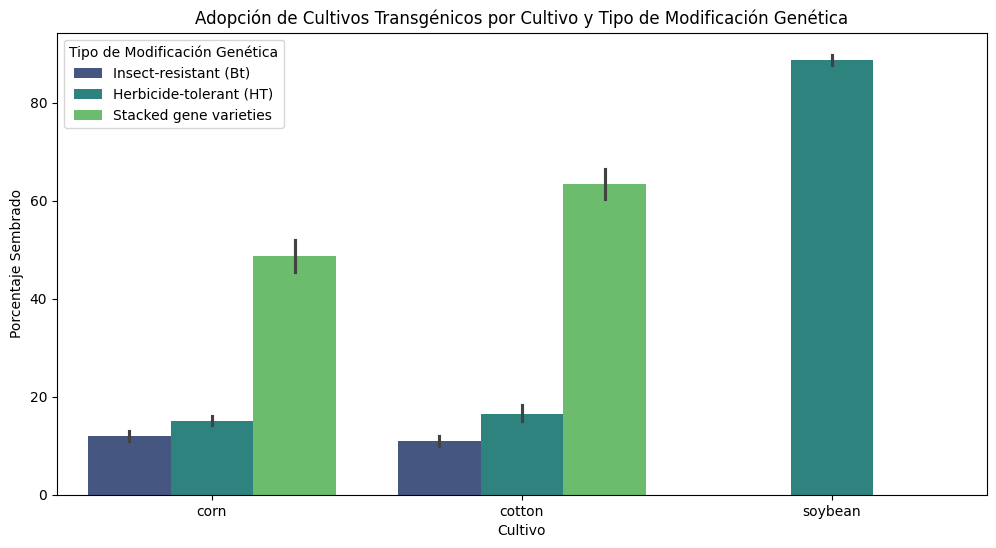

In [86]:
plt.figure(figsize=(12, 6))

fig6 = sns.barplot(df_all_ge, 
            x="crop", 
            y="pct_(%)", 
            hue="variety", 
            palette='viridis'
            )

fig6.set_title('Adopción de Cultivos Transgénicos por Cultivo y Tipo de Modificación Genética')
fig6.set_xlabel('Cultivo')
fig6.set_ylabel('Porcentaje Sembrado')

plt.legend(title='Tipo de Modificación Genética')
# plt.grid(False)
plt.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
**Observaciones:**  
El tipo de modificación genética más empleada en cultivos de soya son los tolerantes a herbicidas, mientras que, para el maíz y el algodón son las variedades combinadas (Stacked gene varieties), que son resistentes a insectos y a herbicidas. 
    
</span>
    
</div>

In [75]:
df_all_ge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2328 entries, 0 to 2975
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   variety  2328 non-null   object        
 1   state    2328 non-null   object        
 2   year     2328 non-null   datetime64[ns]
 3   pct_(%)  2253 non-null   float64       
 4   crop     2328 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 173.7+ KB


In [89]:
# se filtra sólo para el maíz sembrado
df_corn = df_all_ge[df_all_ge["crop"] == "corn"]
df_corn.head()

,variety,state,year,pct_(%),crop
0,Insect-resistant (Bt),Illinois,2000-01-01,13.0,corn
1,Insect-resistant (Bt),Illinois,2001-01-01,12.0,corn
2,Insect-resistant (Bt),Illinois,2002-01-01,18.0,corn
3,Insect-resistant (Bt),Illinois,2003-01-01,23.0,corn
4,Insect-resistant (Bt),Illinois,2004-01-01,26.0,corn


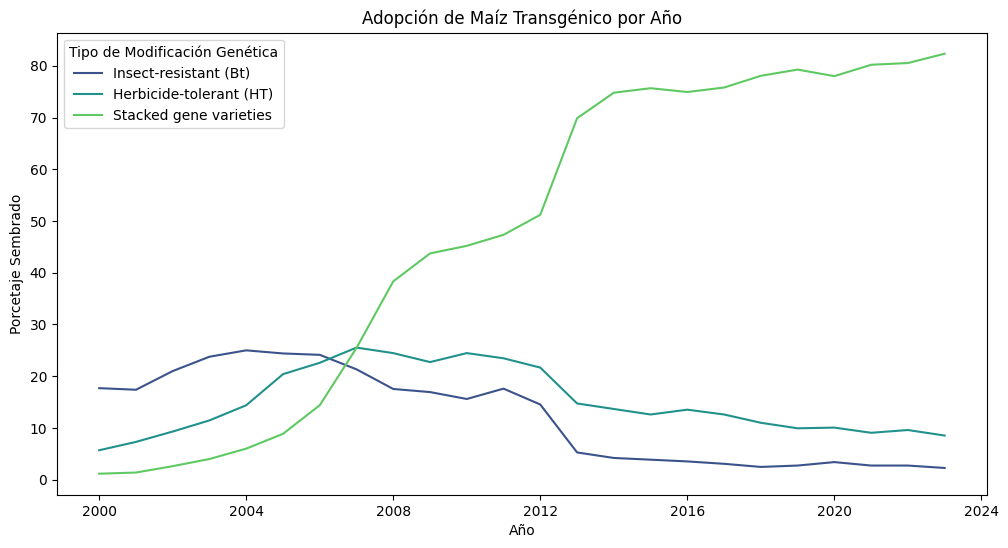

In [90]:
# Gráfico de líneas para mostrar la adopción de los tipos de modificación genética para el maíz a lo largo de los años
plt.figure(figsize=(12, 6))

fig7 = sns.lineplot(data= df_corn,
                    x='year', 
                    y='pct_(%)', 
                    hue= 'variety',  
                    palette='viridis', 
                    errorbar= None
                    )
fig7.set_title('Adopción de Maíz Transgénico por Año')
fig7.set_xlabel('Año')
fig7.set_ylabel('Porcetaje Sembrado')

plt.legend(title= 'Tipo de Modificación Genética')
plt.grid(False)
plt.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
**Observaciones:**  
A partir del 2004 los cultivos de maíz resistentes a insectos y herbicidas aumentó su uso del 5 % al 80 % aproximadamente para el 2023.
    
</span>
    
</div>

In [91]:
# se filtra sólo para el algodón sembrado
df_cotton = df_all_ge[df_all_ge["crop"] == "cotton"]
df_cotton.head()

,variety,state,year,pct_(%),crop
1440,Insect-resistant (Bt),Alabama 2/,2000-01-01,NaN,cotton
1441,Insect-resistant (Bt),Alabama 2/,2001-01-01,NaN,cotton
1442,Insect-resistant (Bt),Alabama 2/,2002-01-01,NaN,cotton
1443,Insect-resistant (Bt),Alabama 2/,2003-01-01,NaN,cotton
1444,Insect-resistant (Bt),Alabama 2/,2004-01-01,NaN,cotton


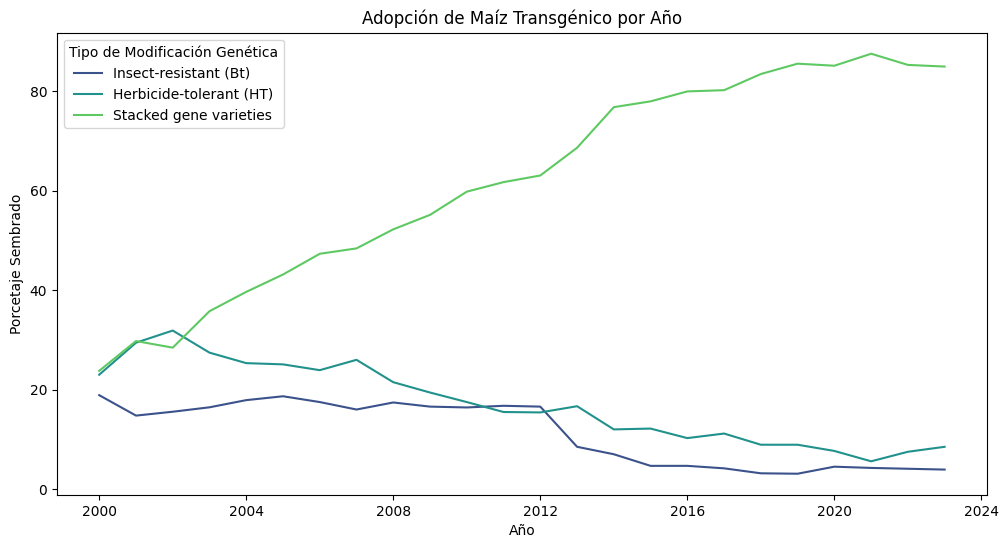

In [92]:
# Gráfico de líneas para mostrar la adopción de los tipos de modificación genética para el algodón a lo largo de los años
plt.figure(figsize=(12, 6))

fig8 = sns.lineplot(data= df_cotton,
                    x='year', 
                    y='pct_(%)', 
                    hue= 'variety',  
                    palette='viridis', 
                    errorbar= None
                    )
fig8.set_title('Adopción de Algodón Transgénico por Año')
fig8.set_xlabel('Año')
fig8.set_ylabel('Porcetaje Sembrado')

plt.legend(title= 'Tipo de Modificación Genética')
plt.grid(False)
plt.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  
    
**Observaciones:**  
A partir del 2001 la adopción de cultivos de algodón resistentes a insectos y herbicidas aumentó su uso del 22 % al 80 % aproximadamente para el 2023.
    
</span>
    
</div>

In [93]:
# se filtra sólo para el algodón sembrado
df_soy = df_all_ge[df_all_ge["crop"] == "soybean"]
df_soy.head()

,variety,state,year,pct_(%),crop
2592,Herbicide-tolerant (HT),Arkansas,2000-01-01,43.0,soybean
2593,Herbicide-tolerant (HT),Arkansas,2001-01-01,60.0,soybean
2594,Herbicide-tolerant (HT),Arkansas,2002-01-01,68.0,soybean
2595,Herbicide-tolerant (HT),Arkansas,2003-01-01,84.0,soybean
2596,Herbicide-tolerant (HT),Arkansas,2004-01-01,92.0,soybean


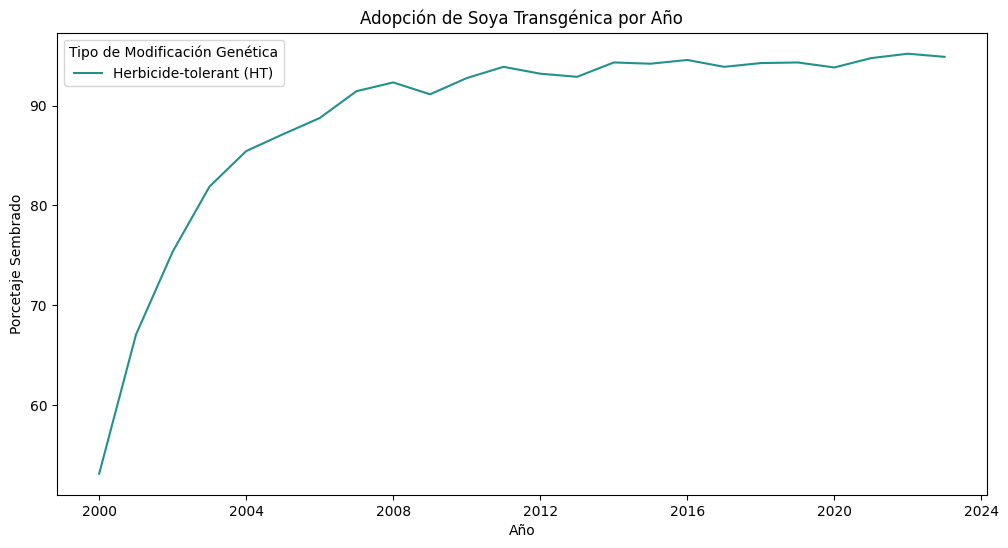

In [96]:
# Gráfico de líneas para mostrar la adopción de los tipos de modificación genética para la soya a lo largo de los años
plt.figure(figsize=(12, 6))

fig9 = sns.lineplot(data= df_soy,
                    x='year', 
                    y='pct_(%)', 
                    hue= 'variety',  
                    palette='viridis', 
                    errorbar= None
                    )
fig9.set_title('Adopción de Soya Transgénica por Año')
fig9.set_xlabel('Año')
fig9.set_ylabel('Porcetaje Sembrado')

plt.legend(title= 'Tipo de Modificación Genética')
plt.grid(False)
plt.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  

**Observaciones:**  
En el 2000 el uso de soya transgénica era mayor del 50 % y continuo aumentando, siendo el 95 % transgénica aproximadamente para el 2023. El tipo de modificación empleada es la resistente a herbicidas

</span>

</div>

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;"> 

# **Conclusiones**

Hay una clara tendencia hacia el aumento en el uso de cultivos transgénicos desde el año 2000 hasta el 2023. En particular, el uso de maíz y algodón genéticamente modificados ha aumentado significativamente, aunque aún representan menos del 50 % del total sembrado. Por otro lado, la soya ha experimentado una adopción masiva de transgénicos, alcanzando aproximadamente el 88.8 % en promedio para el período mencionado.

North Dakota lidera en la siembra de maíz, algodón y soya transgénicos, seguido por otros estados como Mississippi, Arkansas, y varios más en la región central de Estados Unidos. Estos estados muestran una adopción cercana al 40 % en promedio de cultivos transgénicos.

Para soya, la modificación más común es la resistencia a herbicidas, mientras que en maíz y algodón predominan las variedades combinadas, que ofrecen resistencia tanto a insectos como a herbicidas.

Se observa un aumento significativo en el uso de variedades de maíz y algodón resistentes a insectos y herbicidas desde principios de los años 2000 hasta el 2023, indicando una preferencia creciente por estas variedades por su eficacia en el control de plagas y malezas.

En resumen, el análisis muestra una tendencia clara hacia una mayor adopción de cultivos transgénicos en Estados Unidos, especialmente notable en la soya, seguida por maíz y algodón. Esta adopción se ve impulsada por los beneficios agronómicos que ofrecen las variedades transgénicas, como la resistencia a herbicidas e insectos, adaptándose a las necesidades de productividad y manejo de cultivos en la agricultura moderna.

</span>

</div>